In [22]:
%%writefile sample.dot
digraph Sausage_21_och_10 {
  rankdir=LR;
  fontsize=12;
  labelloc="t";
  label="Word sausage (confusion network): 21 och 10";
  nodesep=0.35; ranksep=0.4;

  // Styles
  node [fontname="Helvetica"];
  edge [color=gray40, arrowsize=0.7];

  // Bin headers (explicit labels)
  h21  [label="BIN 1: 21",  shape=plaintext, fontsize=11];
  hOch [label="BIN 2: och", shape=plaintext, fontsize=11];
  h10  [label="BIN 3: 10",  shape=plaintext, fontsize=11];

  // Alternatives (boxed, rounded)
  node [shape=box, style="rounded,filled", fillcolor="#F4F6F8", fontsize=11];

  // 21 → (tjugo|tju|tjugi)(en|ett)
  tjugoen   [label="tjugoen"];
  tjugoett  [label="tjugoett"];
  tjuen     [label="tjuen"];
  tjuett    [label="tjuett"];
  tjugien   [label="tjugien"];
  tjugiett  [label="tjugiett"];

  // och (single)
  och       [label="och"];

  // 10 → (tio|tie)
  tio       [label="tio"];
  tie       [label="tie"];

  // Start/End (labeled so everything on the figure has text)
  START [shape=oval, label="START", fontsize=10, fillcolor="#EEF2F6"];
  END   [shape=oval, label="END",   fontsize=10, fillcolor="#EEF2F6"];

  // Flow
  START -> h21;
  h21 -> tjugoen;  h21 -> tjugoett; h21 -> tjuen; h21 -> tjuett; h21 -> tjugien; h21 -> tjugiett;

  // From each 21 alt to och header + och token
  tjugoen  -> hOch;   tjugoett -> hOch;   tjuen -> hOch;   tjuett -> hOch;   tjugien -> hOch;   tjugiett -> hOch;
  hOch -> och;

  // From och to 10 header + its alts
  och -> h10;
  h10 -> tio; h10 -> tie;

  // To END
  tio -> END; tie -> END;

  // Optional: emphasize a canonical path
  edge [color="#2B6CB0", penwidth=2];
  tjugoett -> hOch; hOch -> och; och -> h10; h10 -> tio;
}


Overwriting sample.dot


In [23]:
!dot -Tpng sample.dot -o sample.png

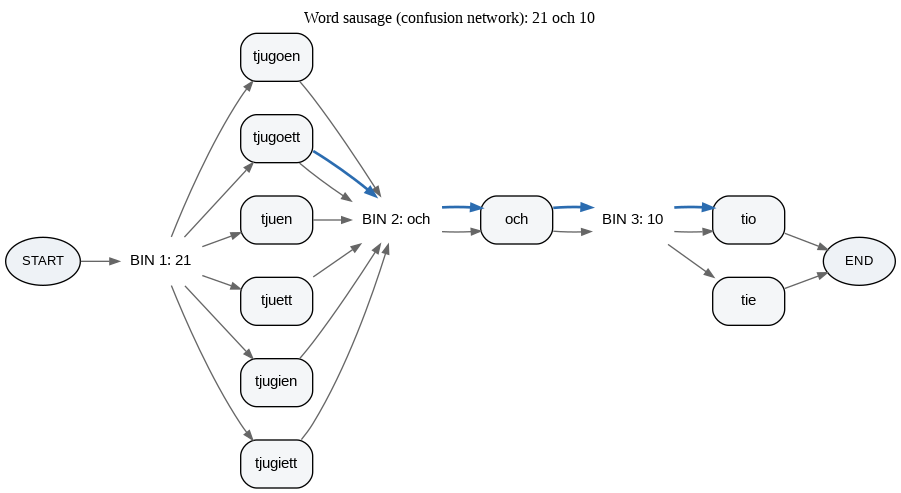

In [24]:
from IPython.display import Image
Image(filename='sample.png')